In [8]:
import os
import cv2

# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)
# cifar10 data - 32x32
from tensorflow.keras.datasets import cifar10

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD, Adam

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# for plotting
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path



In [3]:
main_folder_path = Path(("../in/Tobacco3482-jpg"))

In [4]:


main_folder_path = ("../in/Tobacco3482-jpg") # the folder that contains the images
sorted_dir = sorted(os.listdir(main_folder_path))

images = []
labels = []
for folder in sorted_dir:
    label = folder.split("-")[-1] # extract label from folder name
    folder_path = os.path.join(main_folder_path, folder)
    filenames = sorted(os.listdir(folder_path))
    
    for image in filenames:
        if image.endswith(".jpg"):
            image_path = os.path.join(folder_path, image)
            labels.append(label)
            image = load_img(image_path, target_size=(224, 224))
            image = img_to_array(image)
            image = preprocess_input(image)
            images.append(image)

# Now you have images and corresponding labels
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Number of images: 3482
Number of labels: 3482


In [5]:
images

[array([[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        ...,
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         .

In [6]:
labels

['ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 'ADVE',
 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
X_train = np.array(X_train) / 255.
X_test = np.array(X_test) / 255.

In [13]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [25]:
labelNames = ["ADVE", "Email", 
              "Form", "Letter", 
              "Memo", "News", 
              "Note", "Report", 
              "Resume", "Scientific"]

In [14]:
X_train.shape

(2785, 224, 224, 3)

In [15]:
model = VGG16(include_top=False, 
              pooling='avg',
              input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
for layer in model.layers:
    layer.trainable = False

In [17]:
tf.keras.backend.clear_session()

In [18]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, 
              outputs=output)
# summarize
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
sgd = SGD(learning_rate=lr_schedule)

In [20]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
H = model.fit(X_train, y_train, 
            validation_split=0.1,
            batch_size=128,
            epochs=10,
            verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 847s 42s/step - accuracy: 0.1430 - loss: 2.4258 - val_accuracy: 0.2688 - val_loss: 2.1731
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 836s 42s/step - accuracy: 0.3195 - loss: 2.1506 - val_accuracy: 0.2903 - val_loss: 2.1243
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 804s 40s/step - accuracy: 0.3116 - loss: 2.1243 - val_accuracy: 0.3513 - val_loss: 2.0921
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 925s 46s/step - accuracy: 0.3230 - loss: 2.1119 - val_accuracy: 0.3082 - val_loss: 2.0746
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 922s 46s/step - accuracy: 0.3309 - loss: 2.0734 - val_accuracy: 0.3047 - val_loss: 2.0566
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 917s 46s/step - accuracy: 0.3361 - loss: 2.0553 - val_accuracy: 0.3297 - val_loss: 2.0364
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 922s 46s/step - accuracy: 0.3395 - loss: 2.0364 - val_accuracy: 0.2903 - val_loss: 2.0269
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 923s 46s/step - accuracy: 0.3428 - loss: 2.0141 - val_accuracy: 0.

In [23]:
def plot_history(H, epochs):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

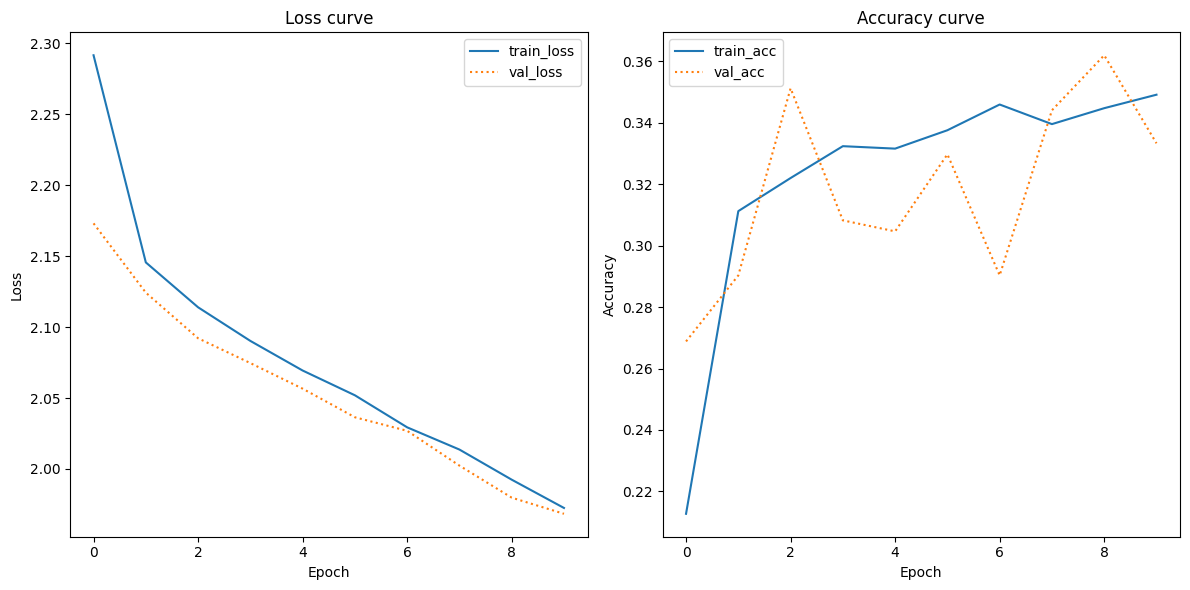

In [24]:
plot_history(H, 10)

In [26]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

6/6 ━━━━━━━━━━━━━━━━━━━━ 231s 38s/step
              precision    recall  f1-score   support

        ADVE       0.00      0.00      0.00        57
       Email       0.49      0.86      0.62       135
        Form       0.00      0.00      0.00        88
      Letter       0.26      0.27      0.27       122
        Memo       0.28      0.85      0.42       109
        News       0.00      0.00      0.00        34
        Note       0.00      0.00      0.00        36
      Report       0.00      0.00      0.00        48
      Resume       0.00      0.00      0.00        15
  Scientific       0.00      0.00      0.00        53

    accuracy                           0.35       697
   macro avg       0.10      0.20      0.13       697
weighted avg       0.18      0.35      0.23       697



/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
